# The Sparks Foundation : GRIP Program Task 2 Data Science 
## Prediction using Unsupervised ML (Level - Beginner)
## K- Means Clustering

* This notebook will walk through some of the basics of K-Means Clustering to  predict the optimum number of clusters
  and represent it visually. 

### by: Mahmoud Swailam Abdallah Atia

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

* retrieve first 3 rows of the csv file

In [2]:
df = pd.read_csv('Iris.csv')# Load the iris dataset

In [3]:
df.head(3)# See the first 3 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


* information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


* explore if there null values or duplicated

In [7]:
df.isnull().sum()#null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.duplicated().sum()#duplicated values

0

Text(0, 0.5, 'count')

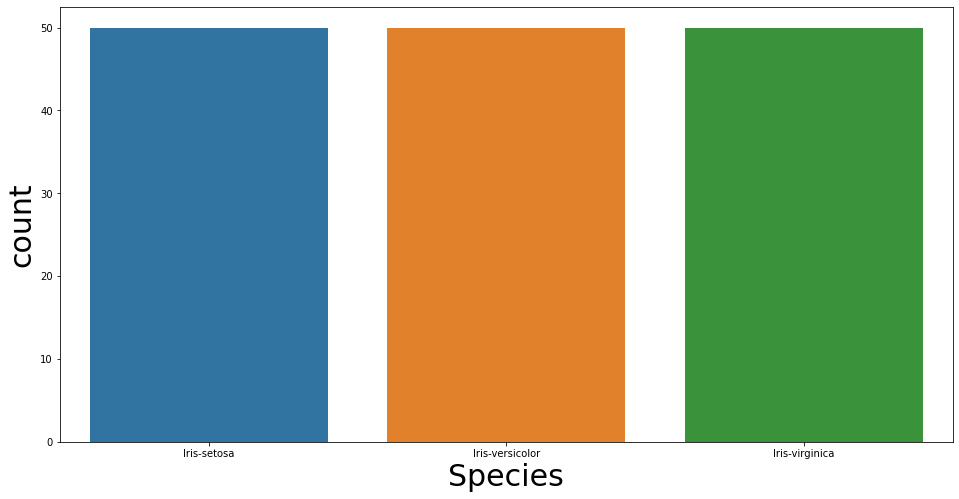

In [15]:
fig, axes = plt.subplots(figsize = (16, 8))
sns.countplot(x='Species', data=df)
plt.xlabel('Species', fontsize=30)
plt.ylabel('count', fontsize=30) 

## we can find the optimal number of clusters using [ Elbow Method ].
* because Dtype of the Species column is object we will retrieve all without it.

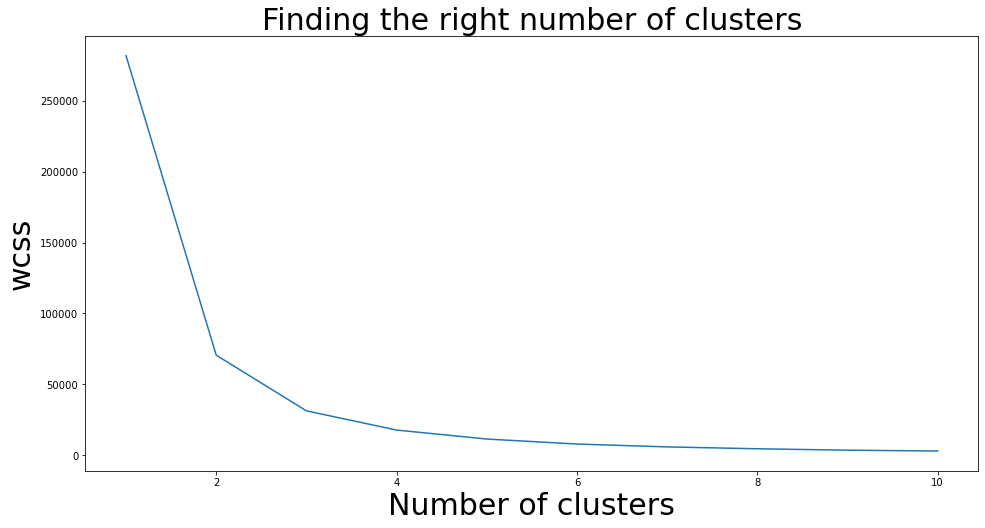

In [16]:
# Finding the optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values#x = first 4 columns from df
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
#k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
#n_init: Number of time the k-means algorithm will be run with different centroid seeds
#max_iter: Maximum number of iterations of the k-means algorithm for a single run.
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
fig, axes = plt.subplots(figsize = (16, 8))
plt.plot(range(1, 11), wcss)
plt.title('Finding the right number of clusters', fontsize=30)
plt.xlabel('Number of clusters', fontsize=30)
plt.ylabel('wcss', fontsize=30) # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [17]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

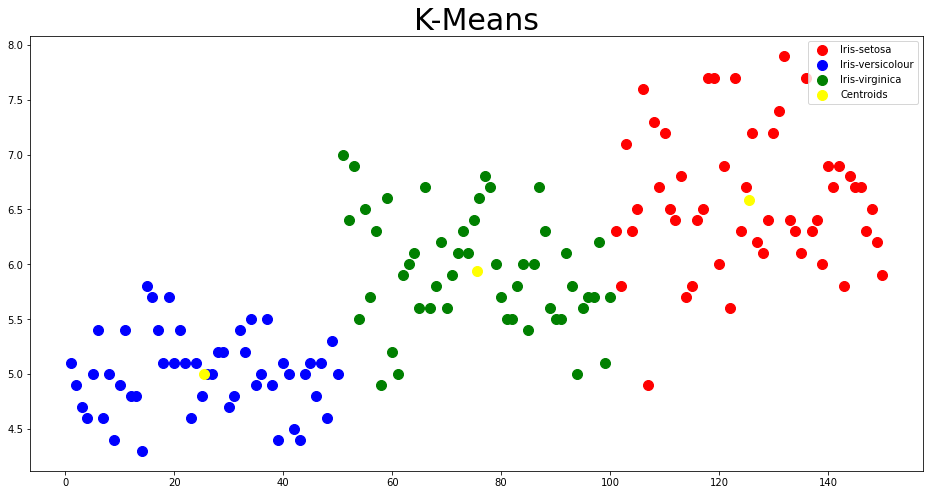

In [18]:
# Visualising the clusters - On the first two columns
fig, axes = plt.subplots(figsize = (16, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title("K-Means", fontsize=30)
plt.legend()